In [16]:
import numpy as np
import matplotlib.pyplot as plt

m = 1
hbar = 1
xmin =-6.5
xmax = 6.5
N = 1000
x = np.linspace(xmin,xmax,N+1)
dx = x[1]-x[0]
print(dx)

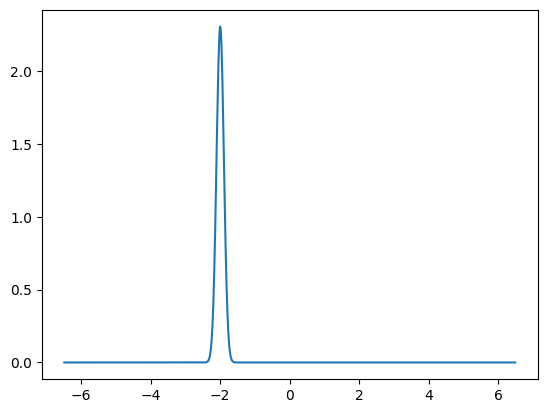

In [17]:
m = 1
hbar = 1
xmin =-6.5
xmax = 6.5
N = 1000
x = np.linspace(xmin,xmax,N+1)
dx = x[1]-x[0]
p = 40
V0 = p**2/(2*m)
sig = 0.15
x0 = 2
V = 0*x
for i in range(len(V)):
    if x[i]>0 and x[i]<0.5:
        V[i]=V0
#plt.plot(x,V)

Psi0 = np.exp( -(x[1:-1]+x0)**2/sig**2)*np.exp(1j*p*(x[1:-1]+x0))
A = np.sum(np.abs(Psi0)**2*dx)
Psi0 = Psi0/np.sqrt(A)
plt.plot(x[1:-1],np.abs(Psi0))

(999, 999)


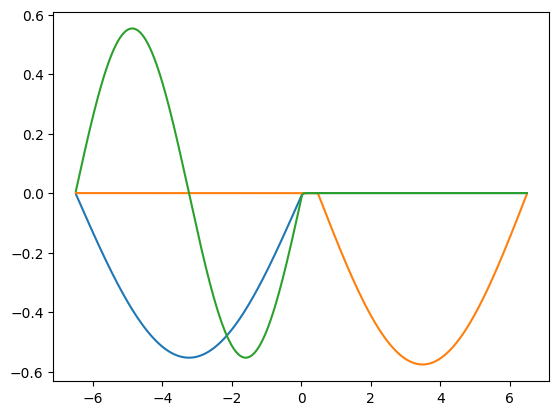

In [18]:
H = (hbar**2/(m*dx**2))*np.diag(np.ones(N-1))+V[1:-1]*np.diag(np.ones(N-1))+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),1)+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),-1)
print(H.shape)

E,psi = np.linalg.eigh(H)
psi = psi.T

A = np.sum(np.abs(psi[0])**2*dx)
psi = psi/np.sqrt(A)
plt.plot(x[1:-1],psi[0])
plt.plot(x[1:-1],psi[1])
plt.plot(x[1:-1],psi[2])

In [21]:
from vpython import rate, gcurve, graph, canvas, color
#https://vpython.org

ModuleNotFoundError: No module named 'vpython'

In [ ]:
#plt.plot(x,0.003*V)
scene = canvas()
g1 = graph(xtitle="x",ytitle="stuff",width=500, height=250)
f1 = gcurve(color=color.blue)
fV = gcurve(color=color.red)

for i in range(len(V)):
    fV.plot(x[i],0.003*V[i])

c = 0*Psi0
for i in range(len(c)):
    c[i] = np.sum(np.conj(psi[i])*Psi0*dx)

t = 0
dt = 0.001
while t<0.5:
    rate(20)
    Psi = 0*psi[0]
    fdata = []
    for i in range(len(c)):
        Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t/hbar)
    for i in range(len(Psi)):
        fdata = fdata +[[x[i],np.abs(Psi[i])]]
    f1.data = fdata
    t = t + dt 
    


NameError: name 'canvas' is not defined